# Install all Importent Library

In [1]:
!apt-get install -y python3-gdal


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  gdal-data libarmadillo9 libarpack2 libcfitsio8 libcharls2 libdap25
  libdapclient6v5 libepsilon1 libfreexl1 libfyba0 libgdal26 libgeos-3.8.0
  libgeos-c1v5 libgeotiff5 libhdf4-0-alt libkmlbase1 libkmldom1 libkmlengine1
  libminizip1 libmysqlclient21 libnetcdf15 libodbc1 libogdi4.1 libpoppler97
  libpq5 libproj15 libqhull7 libspatialite7 libsuperlu5 liburiparser1
  libxerces-c3.2 mysql-common odbcinst odbcinst1debian2 poppler-data proj-bin
  proj-data python3-numpy
Suggested packages:
  geotiff-bin gdal-bin libgeotiff-epsg libhdf4-doc libhdf4-alt-dev hdf4-tools
  libmyodbc odbc-postgresql tdsodbc unixodbc-bin ogdi-bin poppler-utils
  ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum gfortran python-numpy-doc python3-dev
  python3-pytes

In [2]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 50.1 MB/s eta 0:00:00:00:0100:01


# Import data and pre process the data for better prediction

Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B01_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B02_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B03_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B04_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B05_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B06_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B07_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B08_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B8A_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B09_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B11_(Raw).tiff w

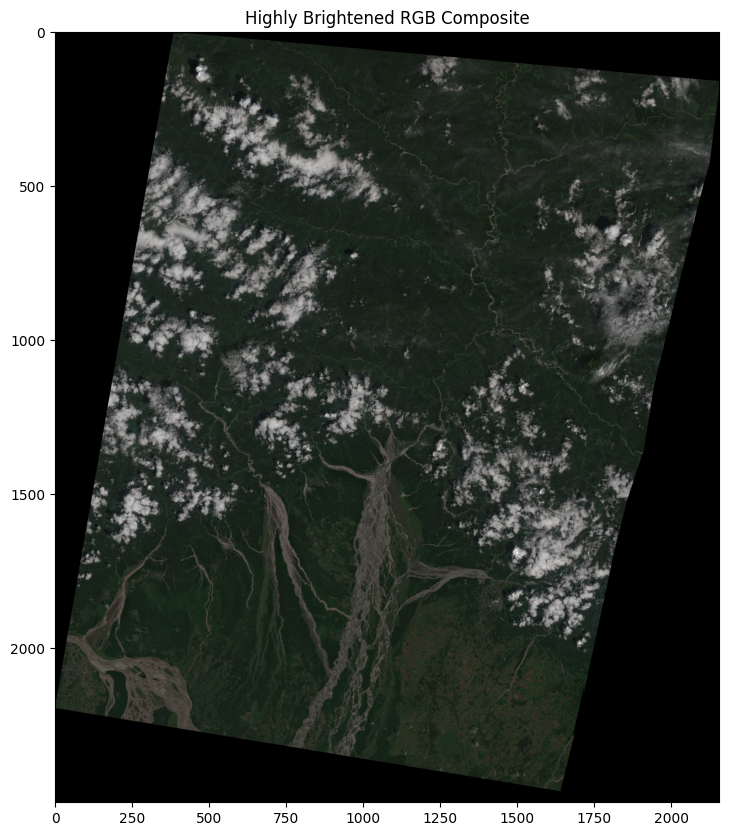

In [3]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Normalize function
def normalize(band):
    """Normalize band values to the range [0, 1]."""
    band_min, band_max = (band.min(), band.max())
    return (band - band_min) / (band_max - band_min)

# Function to read each band
def read_band(filepath):
    """Reads a band from a given filepath and returns the array."""
    with rasterio.open(filepath) as src:
        band = src.read(1)  # Read the first band
        print(f"Read {filepath.split('/')[-1]} with shape {band.shape}")
        return band

# File paths for each band
B1 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B01_(Raw).tiff'  # Aerosol
B2 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B02_(Raw).tiff'  # Blue
B3 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B03_(Raw).tiff'  # Green
B4 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B04_(Raw).tiff'  # Red
B5 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B05_(Raw).tiff'  # Red edge
B6 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B06_(Raw).tiff'  # Classifying vegetation
B7 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B07_(Raw).tiff'  # Classifying vegetation
B8 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B08_(Raw).tiff'  # NIR
B8A = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B8A_(Raw).tiff'  # Classifying vegetation
B9 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B09_(Raw).tiff'  # Water vapor detection
B11 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B11_(Raw).tiff'  # SWIR 1
B12 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B12_(Raw).tiff'  # SWIR 2
B13 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-09-16-00_00_2024-09-16-23_59_Slope_COPERNICUS_30__Grayscale_High_Res.tiff'  # Slope
B14 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-09-16-00_00_2024-09-16-23_59_DEM_COPERNICUS_30__Grayscale_High_Res.tiff'  # DEM

# Read bands
band_B1 = normalize(read_band(B1))
band_B2 = normalize(read_band(B2))  # Blue
band_B3 = normalize(read_band(B3))  # Green
band_B4 = normalize(read_band(B4))  # Red
band_B5 = normalize(read_band(B5))
band_B6 = normalize(read_band(B6))
band_B7 = normalize(read_band(B7))
band_B8 = normalize(read_band(B8))
band_B8A = normalize(read_band(B8A))
band_B9 = normalize(read_band(B9))
band_B11 = normalize(read_band(B11))
band_B12 = normalize(read_band(B12))
band_B13 = normalize(read_band(B13))  # Slope
band_B14 = normalize(read_band(B14))  # DEM

# Brighten function with increased alpha
def brighten(band, alpha=1, beta=0):
    """Brightens the image using a higher alpha value."""
    return np.clip(alpha * band + beta, 0, 255)

# Gamma correction function for additional brightness
def gamma_correction(band, gamma=1.9):
    """Apply gamma correction to brighten the image."""
    inv_gamma = 1.0 / gamma
    return np.power(band, inv_gamma)

# Apply brighten and normalize to the bands
blue_b = brighten(band_B2, alpha=1)
green_b = brighten(band_B3, alpha=1)
red_b = brighten(band_B4, alpha=1)

# Apply gamma correction for further brightening
blue_b = gamma_correction(blue_b, gamma=1.9)
green_b = gamma_correction(green_b, gamma=1.9)
red_b = gamma_correction(red_b, gamma=1.9)

# Normalize the bands after brightening and gamma correction
blue_bn = normalize(blue_b)
green_bn = normalize(green_b)
red_bn = normalize(red_b)

# Create Final Stack
final_stack = np.dstack((
    band_B1, blue_bn, green_bn, red_bn, band_B5, 
    band_B6, band_B7, band_B8, band_B8A, band_B9, 
    band_B11, band_B12, band_B13, band_B14
))

print(f"Final stacked image shape: {final_stack.shape}")

# Create RGB composite and display the image
rgb_composite_bn = np.dstack((red_bn, green_bn, blue_bn))
plt.figure(figsize=(10, 10))
plt.imshow(rgb_composite_bn)
plt.title("Highly Brightened RGB Composite")
plt.show()


#  Save data in tiff format

In [4]:
import numpy as np
import rasterio

# Normalize function
def normalize(band):
    """Normalize band values to the range [0, 1]."""
    band_min, band_max = (band.min(), band.max())
    return (band - band_min) / (band_max - band_min)

# Function to read each band
def read_band(filepath):
    """Reads a band from a given filepath and returns the array."""
    with rasterio.open(filepath) as src:
        band = src.read(1)  # Read the first band
        print(f"Read {filepath.split('/')[-1]} with shape {band.shape}")
        return band

# File paths for each band
B1 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B01_(Raw).tiff'  # Aerosol
B2 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B02_(Raw).tiff'  # Blue
B3 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B03_(Raw).tiff'  # Green
B4 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B04_(Raw).tiff'  # Red
B5 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B05_(Raw).tiff'  # Red edge
B6 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B06_(Raw).tiff'  # Classifying vegetation
B7 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B07_(Raw).tiff'  # Classifying vegetation
B8 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B08_(Raw).tiff'  # NIR
B8A = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B8A_(Raw).tiff'  # Classifying vegetation
B9 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B09_(Raw).tiff'  # Water vapor detection
B11 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B11_(Raw).tiff'  # SWIR 1
B12 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B12_(Raw).tiff'  # SWIR 2
B13 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-09-16-00_00_2024-09-16-23_59_Slope_COPERNICUS_30__Grayscale_High_Res.tiff'  # Slope
B14 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-09-16-00_00_2024-09-16-23_59_DEM_COPERNICUS_30__Grayscale_High_Res.tiff'  # DEM

# Read bands
band_B1 = normalize(read_band(B1))
band_B2 = normalize(read_band(B2))  # Blue
band_B3 = normalize(read_band(B3))  # Green
band_B4 = normalize(read_band(B4))  # Red
band_B5 = normalize(read_band(B5))
band_B6 = normalize(read_band(B6))
band_B7 = normalize(read_band(B7))
band_B8 = normalize(read_band(B8))
band_B8A = normalize(read_band(B8A))
band_B9 = normalize(read_band(B9))
band_B11 = normalize(read_band(B11))
band_B12 = normalize(read_band(B12))
band_B13 = normalize(read_band(B13))  # Slope
band_B14 = normalize(read_band(B14))  # DEM

# Brighten function with increased alpha
def brighten(band, alpha=1, beta=0):
    """Brightens the image using a higher alpha value."""
    return np.clip(alpha * band + beta, 0, 255)

# Gamma correction function for additional brightness
def gamma_correction(band, gamma=1.9):
    """Apply gamma correction to brighten the image."""
    inv_gamma = 1.0 / gamma
    return np.power(band, inv_gamma)

# Apply brighten and normalize to the bands
blue_b = brighten(band_B2, alpha=1)
green_b = brighten(band_B3, alpha=1)
red_b = brighten(band_B4, alpha=1)

# Apply gamma correction for further brightening
blue_b = gamma_correction(blue_b, gamma=1.9)
green_b = gamma_correction(green_b, gamma=1.9)
red_b = gamma_correction(red_b, gamma=1.9)

# Normalize the bands after brightening and gamma correction
blue_bn = normalize(blue_b)
green_bn = normalize(green_b)
red_bn = normalize(red_b)

# Create Final Stack
final_stack = np.stack((
    band_B1, blue_bn, green_bn, red_bn, band_B5, 
    band_B6, band_B7, band_B8, band_B8A, band_B9, 
    band_B11, band_B12, band_B13, band_B14
), axis=2)

print(f"Final stacked image shape: {final_stack.shape}")

# Save the final stacked image
import os
save_path = '/kaggle/working/output1.tiff'
with rasterio.open(save_path, 'w', driver='GTiff', height=2500, width=2157, count=14, dtype=final_stack.dtype) as dst:
    for i in range(14):
        dst.write(final_stack[:, :, i], i+1)

print(f"Final stacked image saved at: {save_path}")

Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B01_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B02_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B03_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B04_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B05_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B06_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B07_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B08_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B8A_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B09_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B11_(Raw).tiff w

/opt/conda/lib/python3.10/site-packages/rasterio/__init__.py:366: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Final stacked image saved at: /kaggle/working/output1.tiff


# save data with geo coordinate

In [5]:
import numpy as np
import rasterio
from rasterio.transform import from_bounds

# Normalize function
def normalize(band):
    """Normalize band values to the range [0, 1]."""
    band_min, band_max = (band.min(), band.max())
    return (band - band_min) / (band_max - band_min)

# Function to read each band
def read_band(filepath):
    """Reads a band from a given filepath and returns the array."""
    with rasterio.open(filepath) as src:
        band = src.read(1)  # Read the first band
        print(f"Read {filepath.split('/')[-1]} with shape {band.shape}")
        return band

# File paths for each band
B1 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B01_(Raw).tiff'
B2 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B02_(Raw).tiff'
B3 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B03_(Raw).tiff'
B4 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
B5 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B05_(Raw).tiff'
B6 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B06_(Raw).tiff'
B7 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B07_(Raw).tiff'
B8 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
B8A = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B8A_(Raw).tiff'
B9 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B09_(Raw).tiff'
B11 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B11_(Raw).tiff'
B12 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B12_(Raw).tiff'
B13 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-09-16-00_00_2024-09-16-23_59_Slope_COPERNICUS_30__Grayscale_High_Res.tiff'
B14 = '/kaggle/input/main-data/25_AUG_Dibang_valley_14B_High_Res/2024-09-16-00_00_2024-09-16-23_59_DEM_COPERNICUS_30__Grayscale_High_Res.tiff'

# Read and normalize bands
band_B1 = normalize(read_band(B1))
band_B2 = normalize(read_band(B2))  # Blue
band_B3 = normalize(read_band(B3))  # Green
band_B4 = normalize(read_band(B4))  # Red
band_B5 = normalize(read_band(B5))
band_B6 = normalize(read_band(B6))
band_B7 = normalize(read_band(B7))
band_B8 = normalize(read_band(B8))
band_B8A = normalize(read_band(B8A))
band_B9 = normalize(read_band(B9))
band_B11 = normalize(read_band(B11))
band_B12 = normalize(read_band(B12))
band_B13 = normalize(read_band(B13))  # Slope
band_B14 = normalize(read_band(B14))  # DEM

# Brighten function
def brighten(band, alpha=1, beta=0):
    """Brightens the image using a higher alpha value."""
    return np.clip(alpha * band + beta, 0, 255)

# Gamma correction function
def gamma_correction(band, gamma=1.9):
    """Apply gamma correction to brighten the image."""
    inv_gamma = 1.0 / gamma
    return np.power(band, inv_gamma)

# Apply brightening and normalization
blue_bn = normalize(gamma_correction(brighten(band_B2)))
green_bn = normalize(gamma_correction(brighten(band_B3)))
red_bn = normalize(gamma_correction(brighten(band_B4)))

# Create the final stack
final_stack = np.stack((
    band_B1, blue_bn, green_bn, red_bn, band_B5, 
    band_B6, band_B7, band_B8, band_B8A, band_B9, 
    band_B11, band_B12, band_B13, band_B14
), axis=2)

print(f"Final stacked image shape: {final_stack.shape}")

# Set CRS and bounds (extent coordinates)
crs = "EPSG:4326"  # WGS 84
left, bottom, right, top = 95.2955681446197502, 27.9192798971072413, 96.1186418324882368, 28.7587331118832488

# Calculate transform
transform = from_bounds(left, bottom, right, top, final_stack.shape[1], final_stack.shape[0])

# Save the final stacked image with metadata
save_path = '/kaggle/working/output2.tiff'
with rasterio.open(
    save_path,
    'w',
    driver='GTiff',
    height=final_stack.shape[0],
    width=final_stack.shape[1],
    count=final_stack.shape[2],
    dtype=final_stack.dtype,
    crs=crs,
    transform=transform
) as dst:
    for i in range(14):
        dst.write(final_stack[:, :, i], i + 1)

print(f"Final stacked image saved at: {save_path}")


Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B01_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B02_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B03_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B04_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B05_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B06_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B07_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B08_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B8A_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B09_(Raw).tiff with shape (2500, 2157)
Read 2024-08-25-00_00_2024-08-25-23_59_Sentinel-2_L2A_B11_(Raw).tiff w

# Check Data 

In [6]:
import rasterio
import numpy as np

# Path to the saved raster file
file_path = '/kaggle/input/output2-stackup/output2.tiff'

# Open the raster file
with rasterio.open(file_path) as src:
    # Extract metadata
    metadata = src.meta
    data = src.read()  # Read all bands
    shape = data.shape
    dtype = metadata['dtype']
    
    # Print metadata
    print(f"Metadata: {metadata}")
    print(f"Shape of the data: {shape}")
    print(f"Data type: {dtype}")

    # Calculate min and max for each band
    band_stats = {}
    for i in range(shape[0]):  # Iterate through bands
        band_min = np.min(data[i])
        band_max = np.max(data[i])
        band_stats[f"Band {i + 1}"] = {'Min': band_min, 'Max': band_max}

    # Print band statistics
    for band, stats in band_stats.items():
        print(f"{band} - Min: {stats['Min']}, Max: {stats['Max']}")


Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 2157, 'height': 2500, 'count': 14, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.00038158260911844535, 0.0, 95.29556814461975,
       0.0, -0.000335781285910403, 28.75873311188325)}
Shape of the data: (14, 2500, 2157)
Data type: float32
Band 1 - Min: 0.0, Max: 1.0
Band 2 - Min: 0.0, Max: 1.0
Band 3 - Min: 0.0, Max: 1.0
Band 4 - Min: 0.0, Max: 1.0
Band 5 - Min: 0.0, Max: 1.0
Band 6 - Min: 0.0, Max: 1.0
Band 7 - Min: 0.0, Max: 1.0
Band 8 - Min: 0.0, Max: 1.0
Band 9 - Min: 0.0, Max: 1.0
Band 10 - Min: 0.0, Max: 1.0
Band 11 - Min: 0.0, Max: 1.0
Band 12 - Min: 0.0, Max: 1.0
Band 13 - Min: 0.0, Max: 1.0
Band 14 - Min: 0.

# transpose the data to chennel data in 3-axis

In [7]:
import rasterio
import numpy as np

# Path to the saved raster file
file_path = '/kaggle/input/output2-stackup/output2.tiff'

# Open the raster file
with rasterio.open(file_path) as src:
    # Extract metadata
    metadata = src.meta
    data = src.read()  # Read all bands
    
    # Transpose the data to (height, width, bands) format
    data = np.transpose(data, (1, 2, 0))
    
    # Extract the new shape
    shape = data.shape
    dtype = metadata['dtype']
    
    # Print metadata
    print(f"Metadata: {metadata}")
    print(f"Shape of the data: {shape}")
    print(f"Data type: {dtype}")

    # Calculate min and max for each band
    band_stats = {}
    for i in range(shape[2]):  # Iterate through bands
        band_min = np.min(data[:, :, i])
        band_max = np.max(data[:, :, i])
        band_stats[f"Band {i + 1}"] = {'Min': band_min, 'Max': band_max}

    # Print band statistics
    for band, stats in band_stats.items():
        print(f"{band} - Min: {stats['Min']}, Max: {stats['Max']}")


Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 2157, 'height': 2500, 'count': 14, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.00038158260911844535, 0.0, 95.29556814461975,
       0.0, -0.000335781285910403, 28.75873311188325)}
Shape of the data: (2500, 2157, 14)
Data type: float32
Band 1 - Min: 0.0, Max: 1.0
Band 2 - Min: 0.0, Max: 1.0
Band 3 - Min: 0.0, Max: 1.0
Band 4 - Min: 0.0, Max: 1.0
Band 5 - Min: 0.0, Max: 1.0
Band 6 - Min: 0.0, Max: 1.0
Band 7 - Min: 0.0, Max: 1.0
Band 8 - Min: 0.0, Max: 1.0
Band 9 - Min: 0.0, Max: 1.0
Band 10 - Min: 0.0, Max: 1.0
Band 11 - Min: 0.0, Max: 1.0
Band 12 - Min: 0.0, Max: 1.0
Band 13 - Min: 0.0, Max: 1.0
Band 14 - Min: 0.

In [8]:
import rasterio
import h5py
import numpy as np

# Path to the input TIFF file
tiff_file_path = '/kaggle/input/output2-stackup/output2.tiff'

# Path to save the H5 file
h5_file_path = '/kaggle/working/output2.h5'

# Read the TIFF file
with rasterio.open(tiff_file_path) as src:
    data = src.read()  # Read all bands (Shape: (bands, height, width))
    metadata = src.meta  # Extract metadata

# Transpose the data to shape (height, width, bands)
data_transposed = np.transpose(data, (1, 2, 0))

# Save the data into an H5 file
with h5py.File(h5_file_path, 'w') as h5_file:
    # Create a dataset for the image data
    h5_file.create_dataset('image', data=data_transposed, dtype=data_transposed.dtype)
    
    # Process metadata and save as attributes
    for key, value in metadata.items():
        try:
            # Convert unsupported types to strings
            if isinstance(value, (dict, tuple, list)):
                h5_file.attrs[key] = str(value)
            else:
                h5_file.attrs[key] = value
        except TypeError:
            print(f"Skipping unsupported metadata key: {key}")

print(f"TIFF file successfully converted to H5 format and saved at {h5_file_path}")


Skipping unsupported metadata key: nodata
Skipping unsupported metadata key: crs
TIFF file successfully converted to H5 format and saved at /kaggle/working/output2.h5


# Divede the Big Image into multiple tile

In [9]:
import numpy as np
import h5py
import os
import rasterio

# Path to your input image
input_image_path = '/kaggle/input/output2-stackup/output2.tiff'

# Read the image using rasterio
with rasterio.open(input_image_path) as src:
    # Read the image bands (all bands)
    image_data = src.read()

# Assuming the image data is in shape (bands, rows, cols), we will need to transpose it
image_data = np.transpose(image_data, (1, 2, 0))  # Shape (rows, cols, bands)

# Image dimensions
rows, cols, bands = image_data.shape

# Define tile size and output directory
tile_size = 128
output_dir = '/kaggle/working/tiles/'
os.makedirs(output_dir, exist_ok=True)

# Coordinates of the image extent (in WGS84 - EPSG:4326)
left, bottom, right, top = 95.2937658139615849, 27.9147693187512012, 96.1230043287004179, 28.7633672614811218

# Calculate the number of tiles in both directions (rows and columns)
num_rows = rows // tile_size
num_cols = cols // tile_size

# Calculate the size of each tile in terms of geographic extent
lat_diff = top - bottom
lon_diff = right - left
lat_per_tile = lat_diff / num_rows
lon_per_tile = lon_diff / num_cols

# Function to save tile as HDF5
def save_tile(tile, index, row, col):
    tile_filename = os.path.join(output_dir, f'img{index:02d}.h5')
    
    # Write the tile data to HDF5
    with h5py.File(tile_filename, 'w') as f:
        # Save the image data
        f.create_dataset('img', data=tile)
        
        # Save the coordinates of the tile as attributes after writing the dataset
        f.attrs['lat_min'] = bottom + row * lat_per_tile
        f.attrs['lat_max'] = bottom + (row + 1) * lat_per_tile
        f.attrs['lon_min'] = left + col * lon_per_tile
        f.attrs['lon_max'] = left + (col + 1) * lon_per_tile
        
        print(f"Saved tile {tile_filename} with coordinates: "
              f"({f.attrs['lon_min']}, {f.attrs['lat_min']}) to ({f.attrs['lon_max']}, {f.attrs['lat_max']})")

# Loop over the large image to create small tiles
tile_index = 1
for i in range(0, rows, tile_size):
    for j in range(0, cols, tile_size):
        # Extract the tile
        tile = image_data[i:i+tile_size, j:j+tile_size, :]
        
        # Make sure the tile size matches
        if tile.shape[0] == tile_size and tile.shape[1] == tile_size:
            save_tile(tile, tile_index, i // tile_size, j // tile_size)
            tile_index += 1

print(f"All tiles saved in {output_dir}")


Saved tile /kaggle/working/tiles/img01.h5 with coordinates: (95.29376581396158, 27.9147693187512) to (95.34559322113276, 27.959432368368564)
Saved tile /kaggle/working/tiles/img02.h5 with coordinates: (95.34559322113276, 27.9147693187512) to (95.39742062830393, 27.959432368368564)
Saved tile /kaggle/working/tiles/img03.h5 with coordinates: (95.39742062830393, 27.9147693187512) to (95.44924803547512, 27.959432368368564)
Saved tile /kaggle/working/tiles/img04.h5 with coordinates: (95.44924803547512, 27.9147693187512) to (95.5010754426463, 27.959432368368564)
Saved tile /kaggle/working/tiles/img05.h5 with coordinates: (95.5010754426463, 27.9147693187512) to (95.55290284981747, 27.959432368368564)
Saved tile /kaggle/working/tiles/img06.h5 with coordinates: (95.55290284981747, 27.9147693187512) to (95.60473025698865, 27.959432368368564)
Saved tile /kaggle/working/tiles/img07.h5 with coordinates: (95.60473025698865, 27.9147693187512) to (95.65655766415982, 27.959432368368564)
Saved tile /kag

# save the data in zip

In [10]:
import zipfile
import os

# Path to the folder you want to zip
folder_path = '/kaggle/working/tiles'
zip_filename = '/kaggle/working/tiles_128px.zip'

# Create a zip file
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, folder_path))

print(f"Zipped folder saved as {zip_filename}")


Zipped folder saved as /kaggle/working/tiles_128px.zip


In [11]:
import h5py

# Open the .h5 file and check the shape of the image
file_path = '/kaggle/working/tiles/img01.h5'
with h5py.File(file_path, 'r') as hdf:
    # Check the keys in the file to find the image data
    keys = list(hdf.keys())
    print("Keys in the file:", keys)
    
    # Assuming the image data is stored under a key, you can load it like this
    image_data = hdf[keys[0]]  # Replace 'keys[0]' with the appropriate key if needed
    print("Shape of the image:", image_data.shape)


Keys in the file: ['img']
Shape of the image: (128, 128, 14)


# Code for reform the big image

In [ ]:
import os
import glob
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Parameters
large_image_shape = (2500, 2157)  # Shape of the original large image
tile_size = (128, 128)  # Size of each tile
num_tiles_y = large_image_shape[0] // tile_size[0]  # Number of tiles in the y dimension
num_tiles_x = large_image_shape[1] // tile_size[1]  # Number of tiles in the x dimension

# Create an empty array for the large image
large_image = np.zeros(large_image_shape)

# Path to the mask tiles
mask_folder = '/kaggle/input/validation-mask/*.h5'
mask_files = sorted(glob.glob(mask_folder))

# Check if mask files are found
if not mask_files:
    print("No mask files found. Please check the directory path.")
else:
    print(f"Found {len(mask_files)} mask files.")

# Loop over the mask files and reconstruct the large image
for i, mask_file in enumerate(mask_files):
    print(f"Processing mask {i + 1}/{len(mask_files)}: {mask_file}")

    # Load the mask tile
    with h5py.File(mask_file, 'r') as hdf:
        # Assuming the dataset key is 'mask', modify if needed
        mask_data = np.array(hdf.get('mask'))
        
        if mask_data.shape != (128, 128):
            print(f"Unexpected mask shape {mask_data.shape} in file {mask_file}.")
            continue
        
        # Calculate the position of the current tile in the large image
        row = (i // num_tiles_x) * tile_size[0]  # Calculate the starting row index
        col = (i % num_tiles_x) * tile_size[1]   # Calculate the starting column index

        # Place the mask tile in the appropriate location in the large image
        large_image[row:row + tile_size[0], col:col + tile_size[1]] = mask_data

print("Reconstruction of the large image completed.")

# Plotting the reconstructed large image
plt.figure(figsize=(12, 10))
plt.imshow(large_image, cmap='gray')  # Adjust the colormap if necessary
plt.title("Reconstructed Large Image from Mask Tiles")
plt.axis('off')  # Hide axes
plt.show()
